In [1]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
np.__version__


'2.0.2'

In [7]:
pip install numpy==1.21.6

     ---------------------------------------- 14.0/14.0 MB 5.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Admin\\anaconda3\\Lib\\site-packages\\~umpy.libs\\libscipy_openblas64_-caad452230ae4ddb57899b8b3a33c55c.dll'
Consider using the `--user` option or check the permissions.



In [1]:
import numpy as np

In [2]:
from tensorflow import keras

In [3]:
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [4]:
(x_train, y_train), (x_test,y_test) = keras.datasets.mnist.load_data()
#Normalize the data used MIN - MAX Normailzation
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
#Adds a new axis(or dimension) to the array x_train at the position -1
#-1 refers to the last dimesion
#x_train was (60000,28,28)  then after this it will be (60000,28,28,1)
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
 
print('x_train shape: ', x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


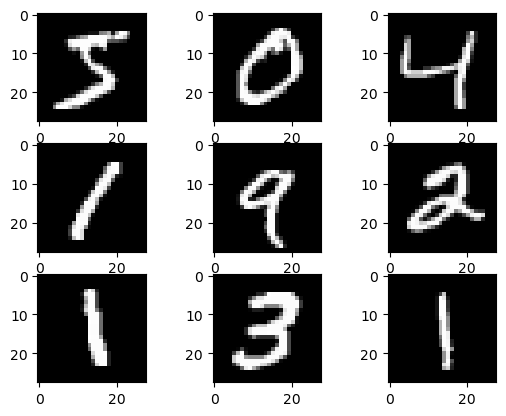

In [6]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [7]:
input_shape = (28,28,1)
num_classes = 10

In [8]:
model = keras.Sequential(
     [
         keras.Input(shape=input_shape),
         layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
         layers.MaxPooling2D(pool_size=(2,2)),
         layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
         layers.MaxPooling2D(pool_size=(2,2)),
         layers.Flatten(),
         layers.Dropout(0.5),
         layers.Dense(num_classes, activation='softmax')
         
     ]

)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [10]:
batch_size=128
epochs=15

model.compile(loss="categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.7657 - loss: 0.7584 - val_accuracy: 0.9758 - val_loss: 0.0934
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9591 - loss: 0.1325 - val_accuracy: 0.9822 - val_loss: 0.0653
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9739 - loss: 0.0882 - val_accuracy: 0.9860 - val_loss: 0.0503
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9780 - loss: 0.0734 - val_accuracy: 0.9893 - val_loss: 0.0408
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9803 - loss: 0.0647 - val_accuracy: 0.9898 - val_loss: 0.0384
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9820 - loss: 0.0587 - val_accuracy: 0.9917 - val_loss: 0.0350
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9839 - loss: 0.0500 - val_accuracy: 0.9905 - val_loss: 0.0352
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9850 - loss: 0.0476 - 

## Evaluating the trained model

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])

Test Loss:  0.025739779695868492
Test Accuracy:  0.9902999997138977


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Predicted Label:  7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Predicted Label:  2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Predicted Label:  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Predicted Label:  0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Predicted Label:  4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted Label:  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted Label:  4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted Label:  9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predicted Label:  5


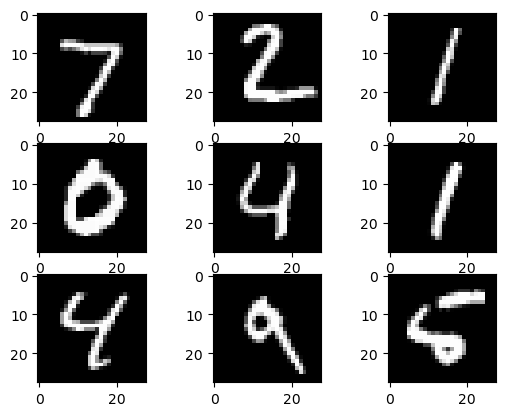

In [24]:
for r in range(9):
    plt.subplot(330 + 1 + r)
    plt.imshow(x_test[r], cmap=plt.get_cmap('gray'))
    
    predicted_label = np.argmax(model.predict(x_test[r].reshape(1, 28, 28)), axis=1)
    print(f"Predicted Label:  {predicted_label[0]}")
plt.show()

In [22]:
sample_image = x_test[1]  # Take the first image in the test set
predicted_label = np.argmax(model.predict(sample_image.reshape(1, 28, 28)), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


In [23]:
print(f"Predicted Label: {predicted_label[0]}")

Predicted Label: 2
